In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
barts_hotspots = pd.read_csv("data/barts_hotspots.csv")
barts_to_all = pd.read_csv("data/barts_to_all.csv")
hotspots_to_all = pd.read_csv("data/hotspots_to_all.csv")
hours_q1 = pd.read_csv("data/hours_q1.csv")
hours_q2 = pd.read_csv("data/hours_q2.csv")

FileNotFoundError: [Errno 2] File b'data/hours_q1.csv' does not exist: b'data/hours_q1.csv'

In [18]:
barts_hotspots["Date"] = pd.to_datetime(barts_hotspots["Date"])
barts_hotspots.head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,793.0,654.0,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,985.0,791.0,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,720.0,528.0,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,941.0,429.0,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN


In [26]:
barts_hotspots.isna().sum()

Date                                                          0
Origin Movement ID                                            0
Origin Display Name                                           0
Destination Movement ID                                       0
Destination Display Name                                      0
Daily Mean Travel Time (Seconds)                             58
Daily Range - Lower Bound Travel Time (Seconds)              58
Daily Range - Upper Bound Travel Time (Seconds)              58
AM Mean Travel Time (Seconds)                              1466
AM Range - Lower Bound Travel Time (Seconds)               1466
AM Range - Upper Bound Travel Time (Seconds)               1466
PM Mean Travel Time (Seconds)                               928
PM Range - Lower Bound Travel Time (Seconds)                928
PM Range - Upper Bound Travel Time (Seconds)                928
Midday Mean Travel Time (Seconds)                           727
Midday Range - Lower Bound Travel Time (

In [24]:
barts_hotspots["DayOfWeek"] = barts_hotspots["Date"].dt.dayofweek

In [31]:
hotspots = hotspots_to_all["Origin Movement ID"].unique()
barts = barts_to_all["Origin Movement ID"].unique()

array([3603, 3692, 3760])

In [78]:
barts

array([3603, 3692, 3760])

In [79]:
hotspots

array([3394, 3792, 3396])

In [73]:
hours = pd.concat([hours_q1, hours_q2], axis=0, join='outer', ignore_index=True)
hours.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3768,3700,3,161.58,87.83,147.02,1.49
1,3772,3660,3,373.98,217.24,328.16,1.65
2,3751,3708,6,1197.27,259.18,1171.36,1.23
3,3761,3608,6,588.32,223.30,557.92,1.36
4,3767,3724,17,438.98,235.70,395.22,1.55


In [80]:
hours = hours[(hours["sourceid"].isin(hotspots) & hours["dstid"].isin(barts)) | (hours["sourceid"].isin(barts) & hours["dstid"].isin(hotspots))]

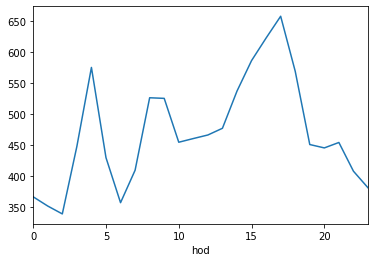

In [75]:
means_by_hours = hours.pivot_table(index=["sourceid", "dstid"], values="mean_travel_time", columns="hod", aggfunc=np.mean)
means_by_hours.iloc[1,:].plot()

In [117]:
locations = {3603 : 'Embarcadero Station',
    3692 : 'Montgomery BART Station',
    3760: 'Powell BART Station', 
    3396: 'Palace of Fine Arts', 
    3394: 'Fisherman\'s Wharf', 
    3792: 'Oracle Park'
    }

In [147]:
times = means_by_hours.transpose().reset_index()
times = times.set_index("hod")
times.columns = [locations[col[0]] + " to " + locations[col[1]] for col in times.columns]
times.head()

,Embarcadero Station to Oracle Park,Montgomery BART Station to Oracle Park,Powell BART Station to Oracle Park,Oracle Park to Embarcadero Station,Oracle Park to Montgomery BART Station,Oracle Park to Powell BART Station
hod,,,,,,
0,415.790,365.960,594.090,448.435,394.170,555.495
1,430.115,351.040,554.355,497.325,380.675,602.055
2,403.750,338.325,494.575,371.915,379.660,547.175
3,421.990,447.450,678.485,339.280,349.935,NaN
4,467.840,575.130,772.160,378.310,414.700,650.000


Text(0.5, 1.0, 'Mean Travel Time at different time')

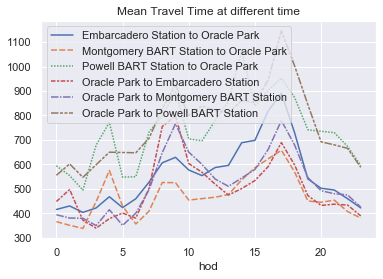

In [124]:
import seaborn as sns; sns.set()

ax = sns.lineplot(data=times)
plt.title("Mean Travel Time at different time")

In [128]:
distances = {"Embarcadero Station to Oracle Park":1.5,
 "Montgomery BART Station to Oracle Park": 1.4,
 "Powell BART Station to Oracle Park": 1.1,
    "Oracle Park to Embarcadero Station":1.3,
    "Oracle Park to Montgomery BART Station": 1.1,
"Oracle Park to Powell BART Station":1.8}

In [142]:
speeds = times.copy()

for col in times.columns:
    speeds[col] = distances[col] / times[col]

In [143]:
speeds.head()

,Embarcadero Station to Oracle Park,Montgomery BART Station to Oracle Park,Powell BART Station to Oracle Park,Oracle Park to Embarcadero Station,Oracle Park to Montgomery BART Station,Oracle Park to Powell BART Station
hod,,,,,,
0,415.790,365.960,594.090,448.435,394.170,555.495
1,430.115,351.040,554.355,497.325,380.675,602.055
2,403.750,338.325,494.575,371.915,379.660,547.175
3,421.990,447.450,678.485,339.280,349.935,NaN
4,467.840,575.130,772.160,378.310,414.700,650.000


Text(0.5, 1.0, 'Mean Average Speed at different time')

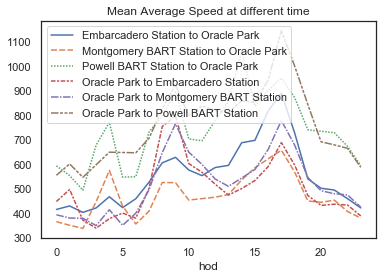

In [144]:
sns.set_style("white")
ax = sns.lineplot(data=speeds, sizes=(100,100))
plt.title("Mean Average Speed at different time")

In [146]:
speeds.to_csv("data/avg_speed_per_path.csv", index=False)

In [150]:
times.reset_index().head()

,hod,Embarcadero Station to Oracle Park,Montgomery BART Station to Oracle Park,Powell BART Station to Oracle Park,Oracle Park to Embarcadero Station,Oracle Park to Montgomery BART Station,Oracle Park to Powell BART Station
0,0,415.790,365.960,594.090,448.435,394.170,555.495
1,1,430.115,351.040,554.355,497.325,380.675,602.055
2,2,403.750,338.325,494.575,371.915,379.660,547.175
3,3,421.990,447.450,678.485,339.280,349.935,NaN
4,4,467.840,575.130,772.160,378.310,414.700,650.000


In [156]:
df = barts_hotspots.copy()

In [158]:
df["Month"] = df["Date"].dt.month

In [159]:
df.head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),DayOfWeek,Month
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN,6,4
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN,5,5
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0,3,4
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN,0,4


In [161]:
df.isna().sum()

Date                                                          0
Origin Movement ID                                            0
Origin Display Name                                           0
Destination Movement ID                                       0
Destination Display Name                                      0
Daily Mean Travel Time (Seconds)                             58
Daily Range - Lower Bound Travel Time (Seconds)              58
Daily Range - Upper Bound Travel Time (Seconds)              58
AM Mean Travel Time (Seconds)                              1466
AM Range - Lower Bound Travel Time (Seconds)               1466
AM Range - Upper Bound Travel Time (Seconds)               1466
PM Mean Travel Time (Seconds)                               928
PM Range - Lower Bound Travel Time (Seconds)                928
PM Range - Upper Bound Travel Time (Seconds)                928
Midday Mean Travel Time (Seconds)                           727
Midday Range - Lower Bound Travel Time (

In [164]:
df = df.dropna()

In [165]:
from sklearn.linear_model import LinearRegression

X = df[["DayOfWeek", "Month"]]
y = df["Daily Mean Travel Time (Seconds)"]
reg = LinearRegression().fit(X, y)

In [169]:
reg.predict([[0,6]])

array([670.47084148])